In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


id: Unique ID for the customer
Gender: Gender of the customer
Age: Age of the customer
Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
Region_Code: Unique code for the region of the customer
Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
Vehicle_Age: Age of the Vehicle
Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
Annual_Premium: The amount customer needs to pay as premium in the year
Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage: Number of Days, Customer has been associated with the company
Response: [1 : Customer is interested, 0 : Customer is not interested]

In [34]:
#EDA
df.shape

(381109, 12)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [36]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [37]:
df = df.drop(['id'], axis=1)

In [16]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


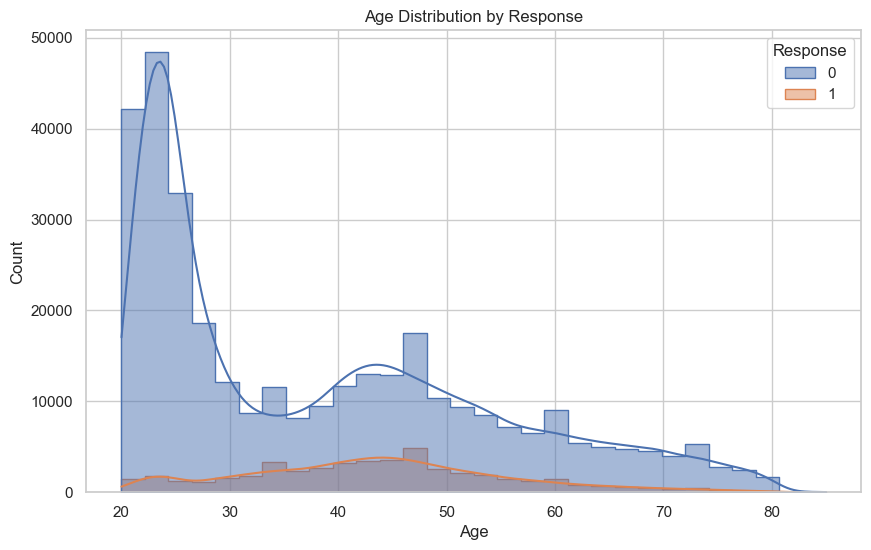

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Response', bins=30, kde=True, element='step', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Response")
plt.show()


In [39]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [45]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [46]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [49]:

# Define mapping for ordinal encoding
vehicle_age_mapping = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
}

# Apply mapping to both train and test data
df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age_mapping)



In [50]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [51]:
x=df.drop(columns= 'Response')
y=df['Response']

In [52]:
cat_col= x.select_dtypes(include='object').columns
num_col= x.select_dtypes(exclude='object').columns

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score, RandomizedSearchCV , KFold

In [56]:
num_pipeline= Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('sc' , StandardScaler())
])
cat_pipeline=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder()),
    ("scaler",StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_col ),
    ('cat',cat_pipeline, cat_col)
])

In [57]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [61]:
xgb_clf = xgb.XGBClassifier()

In [59]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=45)

In [60]:
x_train_processed= preprocessor.fit_transform(x_train)
x_test_processed= preprocessor.transform(x_test)

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    
}

In [63]:
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Change to other metrics if needed (e.g., 'roc_auc')
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [65]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8774
